<a href="https://colab.research.google.com/github/machine-perception-robotics-group/GoogleColabNotebooks/blob/master/MLDL_lecture_notebooks/02_classification_by_euclidean_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. ユークリッド距離を用いたクラス識別


---
## 目的
プロトタイプ法を用いて，carとhumanのデータのプロトタイプを求める．その後，プロトタイプとテストデータのユークリッド距離を求めることでクラス識別を行う．


## プログラムの動作
下記のプログラムを実行すると，`data/cat.txt`と`data/human.txt`の2つを読み込む．次に，データからプロトタイプとして重心を求める．求めた重心からユークリッド距離を計算することでクラス識別を行い，識別結果を表示する．最後に，識別されたグラフを表示する．

## 準備
プログラムの動作に必要なデータをダウンロードし，zipファイルを解凍する．`！`で始まるコマンドはpythonではなく，Linux（Ubuntu）のコマンドを実行している．

In [1]:
!wget -q http://www.mprg.cs.chubu.ac.jp/tutorial/ML_Lecture/sklearn/data.zip
!unzip -q data.zip
!ls
!ls ./data

data  data.zip	__MACOSX  sample_data
car.txt  human.txt


## モジュールのインポート
初めに，必要なモジュールをインポートする．

In [2]:
from os import path
import numpy as np

##データの読み込み
次に，テキストファイルを読み込む．


第1回目と同じであるため，説明は割愛する．`[配列名].shape`は，その配列の要素数を出力する．

In [3]:
in_txt1 = open(path.join('data', 'car.txt'))
in_txt2 = open(path.join('data', 'human.txt'))

car = np.asarray([(line.strip()).split('\t') for line in in_txt1], dtype=float)
print(car.shape)
human = np.asarray([(line.strip()).split('\t') for line in in_txt2], dtype=float)
print(human.shape)

(110, 2)
(382, 2)


## 各データのプロトタイプを計算
データのプロトタイプを計算する．ここでは，プロトタイプとして「各クラスの重心」を用いる．

In [4]:
car_mean = np.array([ np.mean(car[:,0]), np.mean(car[:,1]) ])
human_mean = np.array([ np.mean(human[:,0]), np.mean(human[:,1]) ])

`np.mean([複数の要素])`は，与えられた要素の平均値を求めるnumpyの関数である．`car[:,0]`でcar配列のX軸側のデータのみを抽出することができ，これの平均値を取る．同じように`car[:,1]`でY軸側のデータの平均値を取り，再び`np.array()`でnumpyの配列としている．つまり，`car_mean`および`human_mean`は，それぞれのクラスの平均値が入ることになる．

meanの確認をします．

In [5]:
print(car_mean)
print(human_mean)

[3708.           25.40165497]
[1382.35602094   34.02071602]


##学習用データの作成
先ほど得られたデータと重心を学習用に変更する．

In [6]:
car_mean_test = np.array([car_mean[0], ( car_mean[1] - 20.0 ) * 266.7 ])
human_mean_test = np.array([ human_mean[0], ( human_mean[1] - 20.0 ) * 266.7 ])

car_test = np.c_[ car[:,0], ( car[:,1] - 20.0 ) * 266.7 ]
human_test = np.c_[ human[:,0], ( human[:,1] - 20.0 ) * 266.7 ]

作成された配列は次の通りである：

- `car_mean_test`配列：carの重心のy軸の値を変化させたもの
- `human_mean_test`配列：humanの重心のy軸の値を変化させたもの
- `car_test`配列：carのデータのy軸の値すべてを変化させたもの
- `human_test`配列：humanのデータのy軸の値すべてを変化させたもの

y軸の値はすべて`( 元のy軸の値 - 20.0 ) * 266.7`をしている．なぜこのようなことを行うかというと，x軸とy軸とでスケールが異なり，ユークリッド距離が正しく計算できないからである．前回出力したグラフ`01_graph.png`を見てみると，x軸の範囲が`0`から`10000`なのに対して，y軸の範囲は`0(変更後は20)`から`50`となっていることがわかる．このように，x軸の値に対してy軸の値が小さすぎるため，距離を計算するとy軸の値がほとんど反映されない．そこで，上記の処理を行うことにより，y軸の範囲を`20〜50`から`0〜約8000`に変更して，x軸とy軸のスケールがおおよそ同じになるように変更する．ユークリッド距離を計算するときは，この値を利用する．

## 識別率の計算
先程求めたプロトタイプを用いて，データ1つ1つに対してユークリッド距離を求める．
carのプロトタイプに対してcarの距離を求めると距離が近くなり，humanのプロトタイプに対してcarの距離を求めると距離が遠くなる．
言い換えれば，あるデータがcarかhumanかわからないとき，距離が近い方に所属させることで識別を行うことができる．

In [7]:
car_correct = 0
for i in range(0,car_test.shape[0]):
    human_dist = np.linalg.norm( car_test[i] - human_mean_test )
    car_dist = np.linalg.norm( car_test[i] - car_mean_test )
    if car_dist < human_dist:
        car_correct += 1

print('car recognition rate : ' , car_correct / float(car.shape[0]) , '(' , car_correct ,'/', car.shape[0] , ')')

car recognition rate :  0.8363636363636363 ( 92 / 110 )


識別率を計算するために`car_correct`変数を初期化(ゼロを代入)して，for文で各データに対して識別テストを行っている．

`np.linalg.norm(a-b)`はaとbのユークリッド距離を求めることができるnumpyの関数である．これを利用してテストデータと`human`プロトタイプのユークリッド距離`human_dist`，テストデータと`car`プロトタイプのユークリッド距離`car_dist`を求める．

識別は，`human_dist`より`car_dist`の方が小さければ識別成功とする．なぜならば，`car_dist`はcarのプロトタイプを用いてcarの距離を計算している値であり，`human_dist`はhumanのプロトタイプを用いてcarの距離を計算している値である．正しく識別できているならば`car_dist`の方が小さくなるからである

最後に，識別できた数をデータの母数で割って識別率を計算する．

humanについても同様に処理を行い，識別率を計算する．

In [8]:
human_correct = 0
for i in range(0,human_test.shape[0]):
    human_dist = np.linalg.norm( human_test[i] - human_mean_test )
    car_dist = np.linalg.norm( human_test[i] - car_mean_test )
    if human_dist < car_dist:
        human_correct += 1

print('human recognition rate : ' , human_correct / float(human.shape[0]), '(' , human_correct ,'/', human.shape[0] , ')')

human recognition rate :  0.9554973821989529 ( 365 / 382 )


先程の場合に対して，carとhumanの立場が逆転している．

In [9]:
print('average recognition rate : ' , ( car_correct / float(car.shape[0]) + human_correct / float(human.shape[0]) ) / 2.0)

average recognition rate :  0.8959305092812946


## グラフの描画
matplotlibを用いて，識別結果のグラフを表示する．carとhumanのデータをプロットして，ユークリッド距離による識別結果を塗りつぶしたグラフで表示している．

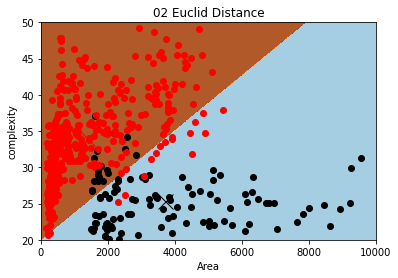

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
subfig = fig.add_subplot(1,1,1)
plt.xlim(xmin=0, xmax = 10000)
plt.ylim(ymin=20, ymax = 50)

xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 500),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 500))

graphdata = np.c_[xx.ravel(), ( yy.ravel() - 20.0 ) * 266.7 ]
Z = []
for i in range(0, graphdata.shape[0]):
    human_dist = np.linalg.norm( graphdata[i] - human_mean_test )
    car_dist = np.linalg.norm( graphdata[i] - car_mean_test )
    if car_dist < human_dist:
        Z.append(0)
    else:
        Z.append(1)

Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

subfig.scatter(car[:,0], car[:,1],color='black')
subfig.scatter(human[:,0], human[:,1],color='red')

subfig.plot(human_mean[0], human_mean[1], color="r", marker="x", markersize=15)
subfig.plot(car_mean[0], car_mean[1],  color="k", marker="x", markersize=15)

subfig.set_title('02 Euclid Distance')
subfig.set_xlabel('Area')
subfig.set_ylabel('complexity')

plt.show()

はじめに，グラフを描画するために`matplotlib.pyplot`をインポートする．基本的には第1回と同じである．今回はグラフのcarのエリアとhumanのエリアを別の色で塗りつぶすという処理を行う．ここでは，詳細な説明は割愛し簡単な説明にとどめるが，興味のある人は「python meshgrid contour」「python 等高線」等で調べてみると良い．

まず，numpyの`meshgrid`を用いて，グラフ描画エリアを細かく等分して格子点を作成する．これを行うことにより，`xx`と`yy`の2つの配列に格子点の各点の値が代入される．

`graphdata = np.c_[xx.ravel(), ( yy.ravel() - 20.0 ) * 266.7 ]`は，先ほど得られた2つの配列を用いて，格子点をグラフ描画のために変更する．`配列.ravel()`は多次元の配列をばらばらにして1次元のものにし，`np.c_[配列1,配列2]`は2つ以上の1次元配列を合成して多次元配列にする関数である．ただし，y軸は先ほど述べた理由により，値を変更している．

for文では，配列`graphdata`の要素ひとつひとつに対してcarおよびhumanのユークリッド距離を計算して，どちらに分類されるか確認する．humanに属するなら0，carに属するなら1と判定して，結果をリスト`Z`に代入する

また，`subfig.plot(human_mean[0], human_mean[1], color="r", marker="x", markersize=15)`は，それぞれのクラスのプロトタイプをバツ印でプロットする．引数の意味は順番に`X値, Y値, color=プロットする色, marker=プロットする印, markersize=プロットするサイズ`である．`marker`は他に「o:丸印」や「^:三角」などが使える．

## 課題

1. 値[2000.0, 40.0]はcar/humanどちらに属するか．ユークリッド距離を表示してどちらのクラスに識別されるか説明せよ．

## ヒント

1. 2つのプロトタイプを用いて距離を確認する．データは`np.array([[2000.0, 40.0]])`として与える．